In [51]:
import pandas as pd
data = pd.read_csv("/content/diabetes_prediction_india.csv").head(10)

In [33]:
data.isna()

Age  Gender    BMI  Family_History  Physical_Activity  Diet_Type  \
0  False   False  False           False              False      False   
1  False   False  False           False              False      False   
2  False   False  False           False              False      False   
3  False   False  False           False              False      False   
4  False   False  False           False              False      False   
5  False   False  False           False              False      False   
6  False   False  False           False              False      False   
7  False   False  False           False              False      False   
8  False   False  False           False              False      False   
9  False   False  False           False              False      False   

   Smoking_Status  Alcohol_Intake  Stress_Level  Hypertension  ...  \
0           False            True         False         False  ...   
1           False           False         False         False  ...   
2           False           False         False         False  ...   
3           False           False         False         False  ...   
4           False           False         False         False  ...   
5           False            True         False         False  ...   
6           False           False         False         False  ...   
7           False            True         False         False  ...   
8           False            True         False         False  ...   
9           False            True         False         False  ...   

   Health_Insurance  Regular_Checkups  Medication_For_Chronic_Conditions  \
0             False             False                              False   
1             False             False                              False   
2             False             False                              False   
3             False             False                              False   
4             False             False                              False   
5             False             False                              False   
6             False             False                              False   
7             False             False                              False   
8             False             False                              False   
9             False             False                              False   

   Pregnancies  Polycystic_Ovary_Syndrome  Glucose_Tolerance_Test_Result  \
0        False                      False                          False   
1        False                      False                          False   
2        False                      False                          False   
3        False                      False                          False   
4        False                      False                          False   
5        False                      False                          False   
6        False                      False                          False   
7        False                      False                          False   
8        False                      False                          False   
9        False                      False                          False   

   Vitamin_D_Level  C_Protein_Level  Thyroid_Condition  Diabetes_Status  
0            False            False              False            False  
1            False            False              False            False  
2            False            False              False            False  
3            False            False              False            False  
4            False            False              False            False  
5            False            False              False            False  
6            False            False              False            False  
7            False            False              False            False  
8            False            False              False            False  
9            Fal

In [34]:
data["Alcohol_Intake"]=data["Alcohol_Intake"].fillna("0")

In [36]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Gender"]=b.fit_transform(data["Gender"])
data["Family_History"]=b.fit_transform(data["Family_History"])
data["Physical_Activity"]=b.fit_transform(data["Physical_Activity"])
data["Diet_Type"]=b.fit_transform(data["Diet_Type"])
data["Smoking_Status"]=b.fit_transform(data["Smoking_Status"])
data["Alcohol_Intake"]=b.fit_transform(data["Alcohol_Intake"])
data["Stress_Level"]=b.fit_transform(data["Stress_Level"])
data["Hypertension"]=b.fit_transform(data["Hypertension"])
data["Urban_Rural"]=b.fit_transform(data["Urban_Rural"])
data["Health_Insurance"]=b.fit_transform(data["Health_Insurance"])
data["Regular_Checkups"]=b.fit_transform(data["Regular_Checkups"])
data["Medication_For_Chronic_Conditions"]=b.fit_transform(data["Medication_For_Chronic_Conditions"])
data["Thyroid_Condition"]=b.fit_transform(data["Thyroid_Condition"])
data["Diabetes_Status"]=b.fit_transform(data["Diabetes_Status"])
data["Polycystic_Ovary_Syndrome"]=b.fit_transform(data["Polycystic_Ovary_Syndrome"])

In [37]:
x=data.drop("Diabetes_Status",axis=1)
y=data["Diabetes_Status"]
from sklearn.decomposition import PCA
z=PCA(n_components=4)
x=z.fit_transform(x)
x=pd.DataFrame(data=x,columns=["a","b","c","d"])
print(x)
print(y)

            a          b          c          d
0  -75.270667 -39.514702 -29.907912  21.912524
1  -90.427213  28.630603 -33.740222  -1.871112
2  103.436629  18.305151   8.102583   0.962476
3  -14.943526 -46.666215   4.151535 -35.371399
4   46.182798 -57.178584  11.616212  22.938827
5  -61.819126  22.630462  77.620627  12.811022
6  104.266664 -23.950753  14.921479 -13.019480
7 -104.347618  -4.650260 -11.630166 -11.521438
8   90.751639  32.211704 -50.760561   8.275307
9    2.170421  70.182595   9.626425  -5.116727
0    1
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    0
9    1
Name: Diabetes_Status, dtype: int64


In [38]:
#z_test
import statsmodels.stats.api as sms
mean_iq = data['BMI'].mean()
print(f"Mean IQ: {mean_iq}")

test_stat, p_value = sms.ztest(data['BMI'], value=101)
print("Test Statistic: ", test_stat)
print("p-value: ", p_value)

print("\n************Conclusion*************")
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis\nThe IQ value of the sample is not equal to the population mean.\nThe new students' IQ is significantly different from 101.")
else:
    print("\nFail to reject the null hypothesis\nThe IQ value of the sample is less than or equal to the population mean.\nThe new students' IQ is the same as the population mean.")


Mean IQ: 27.890000000000004
Test Statistic:  -31.980697104275357
p-value:  2.0231748222843856e-224

************Conclusion*************

Reject the null hypothesis
The IQ value of the sample is not equal to the population mean.
The new students' IQ is significantly different from 101.


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

            a          b          c          d
7 -104.347618  -4.650260 -11.630166 -11.521438
8   90.751639  32.211704 -50.760561   8.275307
6  104.266664 -23.950753  14.921479 -13.019480
4   46.182798 -57.178584  11.616212  22.938827
2  103.436629  18.305151   8.102583   0.962476
5  -61.819126  22.630462  77.620627  12.811022
0  -75.270667 -39.514702 -29.907912  21.912524
9    2.170421  70.182595   9.626425  -5.116727
1  -90.427213  28.630603 -33.740222  -1.871112
7    0
8    0
6    0
4    1
2    1
5    0
0    1
9    1
1    0
Name: Diabetes_Status, dtype: int64


In [40]:
from xgboost import XGBClassifier
br = XGBClassifier()
br.fit(xtrain, ytrain)
ypred = br.predict(xtest)

In [41]:
c=br.predict([[59.874639,32.563420,-45.24482,45.52372]])
print(c)

[0]


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)


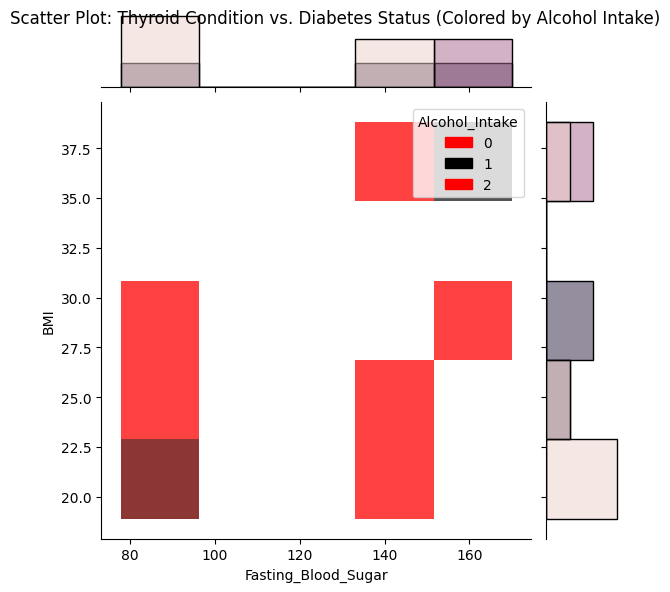

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(x='Fasting_Blood_Sugar', y='BMI', data=data, hue='Alcohol_Intake', kind='hist', palette=['red', 'black'])
plt.suptitle('Scatter Plot: Thyroid Condition vs. Diabetes Status (Colored by Alcohol Intake)')
plt.show()

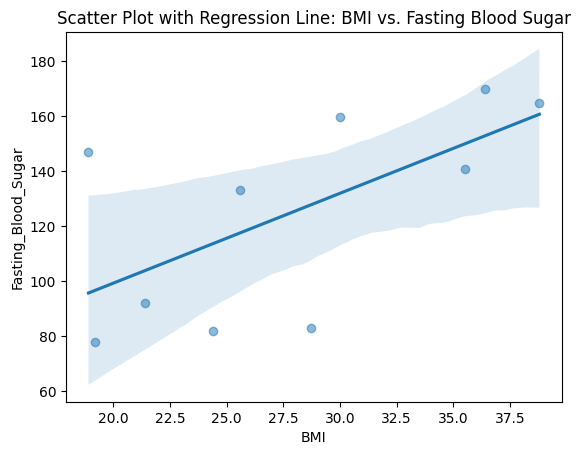

In [43]:
sns.regplot(x='BMI', y='Fasting_Blood_Sugar', data=data, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: BMI vs. Fasting Blood Sugar')
plt.show()

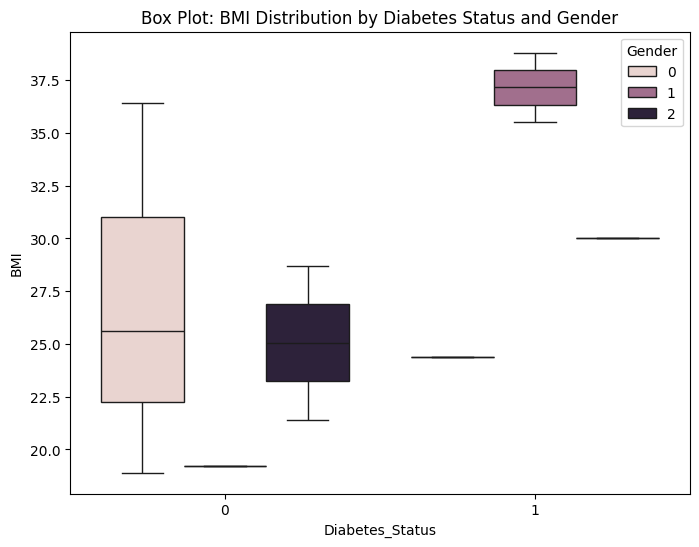

In [44]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, hue='Gender')
plt.title('Box Plot: BMI Distribution by Diabetes Status and Gender')
plt.show()

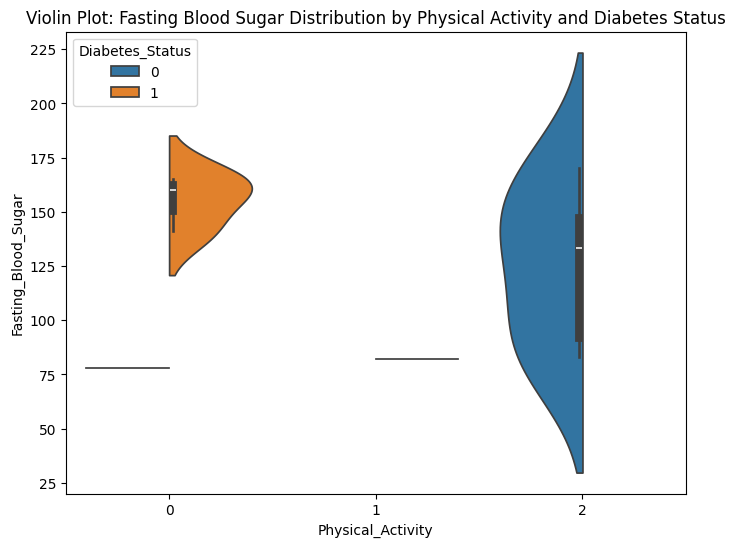

In [45]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.violinplot(x='Physical_Activity', y='Fasting_Blood_Sugar', data=data, hue='Diabetes_Status', split=True)
plt.title('Violin Plot: Fasting Blood Sugar Distribution by Physical Activity and Diabetes Status')
plt.show()

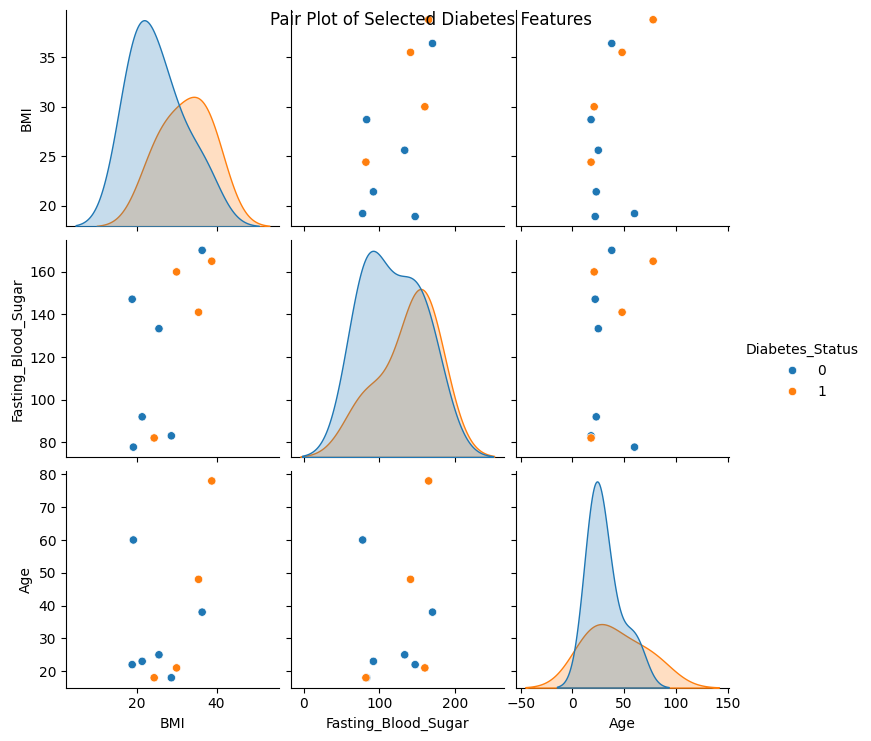

In [46]:
sns.pairplot(data[['BMI', 'Fasting_Blood_Sugar', 'Age', 'Diabetes_Status']], hue='Diabetes_Status')
plt.suptitle('Pair Plot of Selected Diabetes Features')
plt.show()

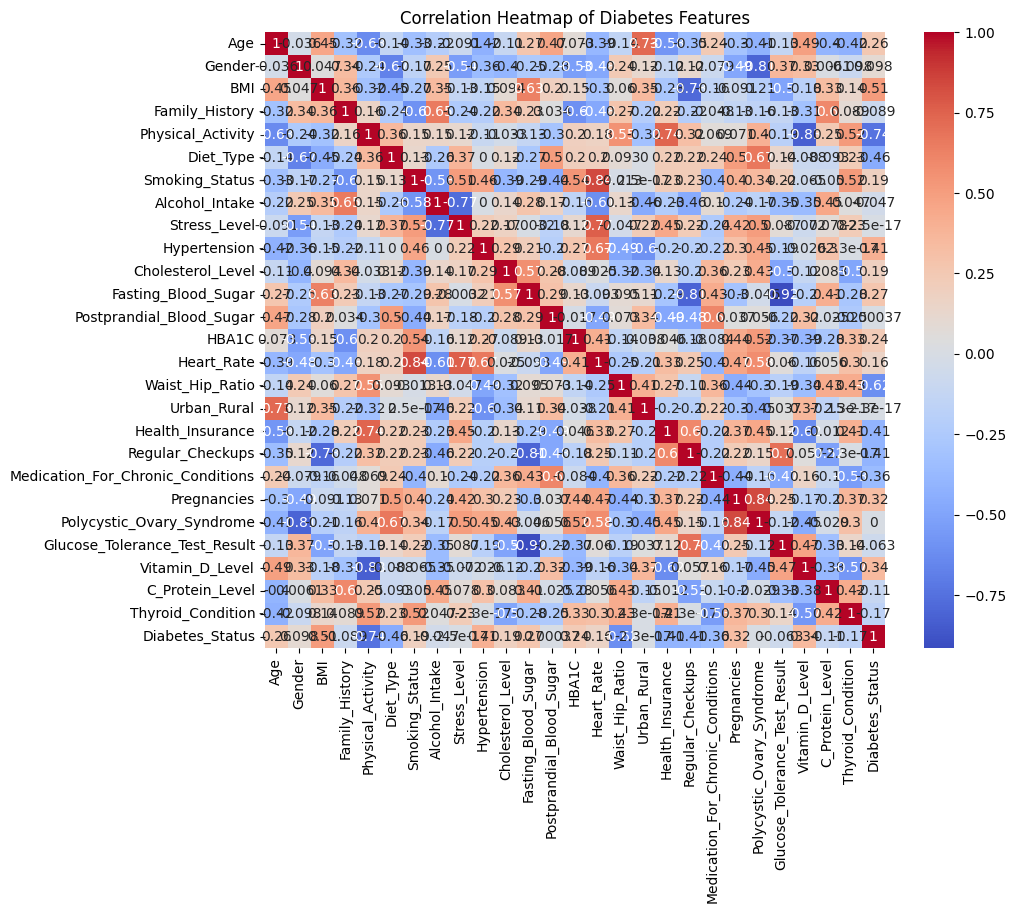

In [47]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Diabetes Features')
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

1.0


In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

